# Quicksort vs Counting sort

## Introduzione
L'ordinamento di una sequenza di elementi rappresenta uno dei punti fondamentali per una gestione efficiente dei dati. Esistono moltissimi algoritmi di ordinamento diversi, ognuno con i suoi vantaggi e svantaggi.

Gli algoritmi di ordinamento che verranno presi in esame in questa relazione sono il **Quicksort** e il **Counting sort**. La sequenza da ordinare è composta esclusivamente da numeri naturali.

## Quicksort

### Funzionamento
Il quicksort è uno degli algoritmi di ordinamento più efficienti che siano stati ideati, e questo lo rende uno dei più utilizzati.
Per ordinare sfrutta il paradigma del **Divide et Impera**, che consiste nello scomporre un problema complesso in sotto problemi più semplici da risolvere. Ciò viene fatto attraverso vari metodi:
* *quicksort(A, p, r)*: funge da chiamante e gestisce le operazioni. Si occupa anche di scomporre il problema complesso in sotto problemi *(divide)*;
* *randomized_partition(A, p, r)*: si occupa dell'estrazione **casuale** del pivot. Questa operazione è fondamentale poiché impedisce di sfociare nel caso peggiore. Senza questa operazione, l'efficienza dipende dall'ordine dei dati in ingresso;
* *partition(A, p, r)*: gestisce l'ordinamento effettivo dei valori *(impera)*.

La ricomposizione del problema complesso avviene in automatico, poiché vengono modificate le posizioni direttamente sul vettore di partenza.

### Analisi delle complessità
Il quicksort è un algoritmo i cui tempi di elaborazione dipendono fortemente dal bilanciamento delle partizioni. Se le dimensioni dei sotto vettori sono simili tra di loro, allora l'efficienza dell'algoritmo è massima.
Asintoticamente, il tempo di esecuzione atteso per il caso migliore e il caso medio equivale a:
$$\theta(n log n)$$
Se invece il partizionamento è totalmente sbilanciato, quindi con un sotto vettore lungo *0* e l'altro lungo *n - 1*, allora tutti i vantaggi forniti perdono di valore, ottenendo un tempo asintotico pari a:
$$O(n^2)$$
Per ovviare a questo problema, basta scegliere il pivot in maniera casuale, senza prendere, come di consueto, la stessa posizione per ogni iterazione. In questo modo, anche se la sequenza fornita in ingresso è quasi ordinata, riesco a evitare di ottenere una complessità operazionale quadratica.
Questa piccola modifica rende l'algoritmo indipendente dall'ordine di partenza.

### Caratteristiche

Il quicksort non è **stabile**. Ciò vuol dire che, dati due valori equivalenti, l'ordine che questi hanno in partenza non è detto che sia lo stesso dopo che è avvenuto l'ordinamento.

Per quanto riguarda l'utilizzo di memoria, il quicksort è un algoritmo che ordina sul posto, per cui non occupa memoria aggiuntiva, al contrario del Counting sort.

In [1]:
import random

def partition(A, p, r):
    x = A[r]
    i = p - 1

    for j in range(p, r):
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i]

    A[i + 1], A[r] = A[r], A[i + 1]
    return i + 1

def randomized_partition(A, p, r):
    i = random.randint(p, r) # estrazione pivot
    A[r], A[i] = A[i], A[r]
    return partition(A, p, r)

def quicksort(A, p, r):
    if p < r:
        q = randomized_partition(A, p, r)
        quicksort(A, p, q - 1)
        quicksort(A, q + 1, r)

## Counting sort

Il counting sort è un algoritmo di ordinamento che non è basato sui confronti.   Questa sua caratteristica gli permette di ordinare dei valori seguendo una complessità lineare.

### Funzionamento
Come si deduce dal nome, il counting sort si basa sul conteggio. L'algoritmo infatti conta quante volte ciascun valore appare nella sequenza in ingresso, in modo da calcolare la posizione esatta di ciascun valore nel vettore di uscita.
Funziona in questo modo:
* Istanza: vengono istanziati i vettori addetti al conteggio sulla base del vettore in ingresso A:
    * B: vettore della stessa lunghezza di A che conterrà i valori ordinati;
    * C: vettore della lunghezza pari al valore massimo di A. Ospiterà il numero di volte che ciascun numero appare.
* Conteggio: si conta quante volte appare ciascun valore, salvando ogni risultato nella corrispettiva cella in C;
* Somma: si modifica C in modo da ottenere che ciascuna cella contenga la somma di tutti gli elementi precedenti. Tale somme è detta **cumulativa**;
* Uscita: sulla base di A e C, i valori vengono salvati nel vettore B dedicato.

### Analisi complessità
Il counting sort è estremamente veloce. Il tempo asintotico ottenuto è pari a:
$$\theta(n + k)$$
dove *n* indica il numero di elementi della sequenza e *k* indica il tempo impiegato per organizzare le strutture dedicate.
La complessità temporale di questo algoritmo è **lineare**.

Questo algoritmo sostituisce il costo temporale con uno spaziale, infatti il problema principale del counting sort riguarda la quantità di memoria utilizzata per conteggiare ciascun valore. Lo spazio utilizzato vale:
$$\theta(n + k)$$
con *n* che indica la dimensione di B (vettore ordinato in uscita) e *k* quella di C.

### Caratteristiche
A differenza del Quicksort, il Counting sort è **stabile**, per cui l'ordine di partenza di elementi equivalenti viene rispettato anche nella sequenza finale ordinata.

Il valore massimo che appare determina la dimensione di C. Se il massimo è molto grande, allora lo sarà anche lo spazio necessario all'algoritmo per funzionare.
Questo fa capire che, se i valori da riordinare presentano discrepanze notevoli tra di loro, come di svariati ordini di grandezza, questo porterà a un dispendio eccessivo di memoria. Viceversa, se i valori sono vicini tra di loro, C avrà una dimensione molto ridotta, permettendo valori temporali molto bassi di *k*.
Il Counting sort è quindi ideale per un pull di valori possibili ristretto, mentre peggiora se vanno disperdendosi.

Un altro svantaggio riguarda il fatto che questo algoritmo è applicabile esclusivamente per numeri interi positivi, a differenza del Quicksort che è applicabile alla maggior parte di tipologie di dati.

In [2]:
def countingsort(A, k):
    B = [0 for _ in range(len(A))]
    C = [0 for _ in range(k + 1)]

    for j in range(len(A)):
        C[A[j]] += 1

    for i in range(1, k + 1):
        C[i] += C[i - 1]

    for j in range(len(A) - 1, -1, -1):
        B[C[A[j]] - 1] = A[j]
        C[A[j]] -= 1

    return B

## Esperimento

Per mettere a confronto questi due algoritmi, si misurano le tempistiche impiegate da ciascuno per ordinare sequenze numeriche. Il test si svolge in questo modo:
* per prima cosa viene generato un vettore di numeri casuali. Rappresenta l'ingresso e sarà lo stesso per entrambi gli algoritmi, in modo da garantire equità per le condizioni iniziali;
* viene misurato il tempo totale di ordinamento e il risultato viene salvato.
Per evitare che le condizioni della macchina influenzino i tempi di esecuzione, lo stesso ingresso viene ordinato più volte, così da avere più misurazioni indipendenti e poter quindi calcolarne la mediana, ottenendo un risultato il più possibile pulito;
* questi due passaggi rappresentano una singola iterazione. Per notare la variazione delle tempistiche in base alla dimensione dell'ingresso, ogni iterazione viene eseguite più volte, incrementando di volta in volta il numero di elementi che devono essere riordinati.

In [3]:
import time
import statistics

# parametri
max_size = 20000 # numero massimo di elementi che comporranno il vettore
tests = 10 # numero di test per ricavare una misurazione
increment = 200 # incremento di elementi tra due test
max_value = 10000 # valore massimo che può essere generato

def tester():
    times_c, sizes_c = [], []
    times_q, sizes_q = [], []

    for i in range(increment, max_size + 1, increment):
        vet = [random.randint(0, max_value) for _ in range(i)]

        counting_optime = []
        quick_optime = []

        for j in range(tests):
            # quick sort
            v_copy = vet.copy()
            start = time.perf_counter()
            quicksort(v_copy, 0, len(v_copy) - 1)
            finish = time.perf_counter()

            if not check_result(v_copy):
                return [None, None]
            quick_optime.append((finish - start) * 1000)

            # counting sort
            v_copy = vet.copy()
            start = time.perf_counter()
            v_sorted = countingsort(v_copy, max_value)
            finish = time.perf_counter()

            if not check_result(v_sorted):
                return [None, None]
            counting_optime.append((finish - start) * 1000)

        # Salviamo i risultati medi/mediani
        times_c.append(statistics.median(counting_optime))
        sizes_c.append(i)

        times_q.append(statistics.median(quick_optime))
        sizes_q.append(i)

    return [times_c, sizes_c], [times_q, sizes_q]

def check_result(vet):
    for i in range(len(vet) - 1):
        if vet[i] > vet[i + 1]:
            return False
    return True

## Risultati attesi

Considerando le caratteristiche di ciascun algoritmo, mi aspetto che inizialmente, quando il numero di elementi è estremamente ridotto, l'ordinamento per confronti abbia un tempo di esecuzione minore, poiché non devono essere effettuate allocazioni di memoria o conteggi che rallenterebbero solamente il sistema.

Incrementando il pull di numeri generati, le tempistiche ottenute dal Counting sort dovrebbero avere una crescita molto inferiore rispetto a quella del Quicksort.

Asintoticamente parlando, mi aspetto che entrambi gli algoritmi tendano a una crescita lineare:
* Counting sort: *n* rappresenta la dimensione dell'ingresso e *k* la costante di tempo che permette l'inizializzazione dell'ambiente.
* Quicksort: nonostante *log n* sia una funzione logaritmica, il prodotto con *n* la fa tendere comunque a una funzione lineare.

Grafico salvato con successo come plots_result.png


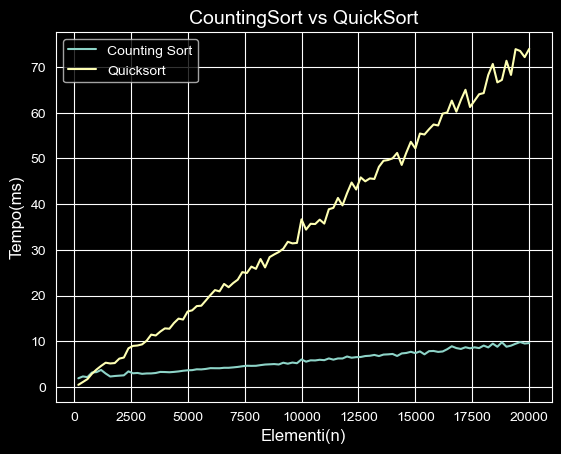

In [4]:
import matplotlib.pyplot as plt

def generate_plot(val1, val2, name):
    plt.plot(val1[1], val1[0], label='Counting sort')
    plt.plot(val2[1], val2[0], label='Quicksort')

    # info plot
    plt.title('Counting sort vs QuickSort', fontsize=14)
    plt.xlabel('Elementi(n)', fontsize=12)
    plt.ylabel('Tempo(ms)', fontsize=12)

    plt.legend()
    plt.grid(True)
    plt.savefig(name)

    print(f"Grafico salvato con successo come {name}")

counting_res, quick_res = tester()
if counting_res is not None and quick_res is not None:
    generate_plot(counting_res, quick_res, 'plots_result.png')
else:
    print("Ordinamento non riuscito")

## Conclusioni

Osservando il grafico ottenuto, si nota che vengono soddisfatte tutte le supposizioni formulate all'inizio.
Entrambi tendono a una funzione di tipo lineare, anche se con crescite molto diverse tra loro.

Se il numero di elementi che devono essere riordinati è ridotto oppure se non si ha a disposizione troppa memoria, il Quicksort rappresenta la scelta migliore.
Se invece lo spazio non rappresenta alcun problema e il numero di elementi non è troppo ridotto, il Counting sort sarà sempre la scelta migliore in quanto garantisce delle tempistiche estremamente basse.

Questa scelta può essere effettuata solo se l'insieme è composto da numeri naturali.